In [1]:
from Stock_Data_Class import StockData
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt


$\textbf{Data Processing}$

Current Tickers in dataframe :  ['AAPL' 'AMZN' 'BA' 'CVX' 'DIS' 'DOW' 'GS' 'JNJ' 'JPM' 'KO' 'MCD' 'MMM'
 'MRK' 'MSFT' 'NKE' 'PFE' 'PG' 'SPG' 'T' 'WFC' 'XOM' '^SPX']
1980-12-12 00:00:00


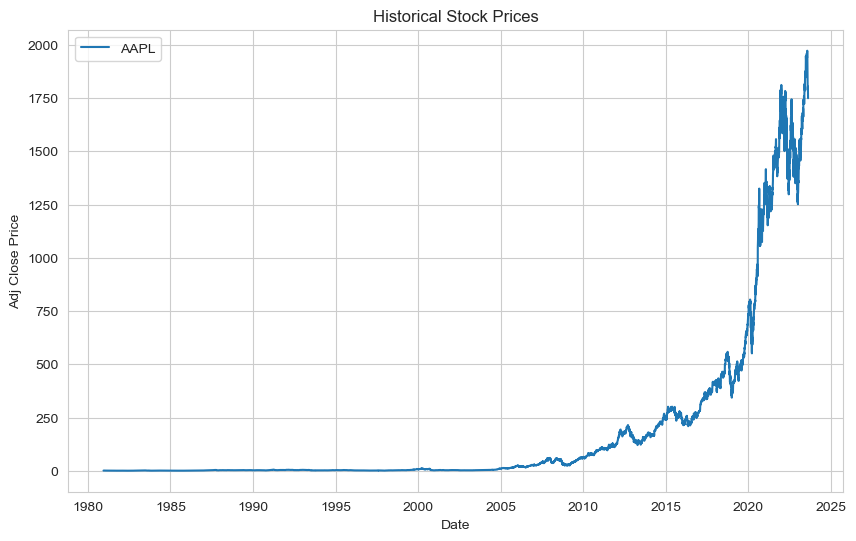

In [2]:
# Utilisation de la classe
folder_path = r"data\raw"

stocks = StockData(folder_path)
stocks.infos()
apple_data = stocks.get_historical_data('AAPL',from_date="2020-1-1",to_date="2020-10-1")

stocks.plot_stocks(["AAPL"],normalize=True)

In [4]:
stocks.data.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,Return
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099450,469033600,AAPL,NaN
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800,AAPL,-0.052177
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000,AAPL,-0.073392
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600,AAPL,0.024742
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600,AAPL,0.028993


In [26]:
def sequential_split_by_ticker(data, train_fraction=0.8):
    # Assuming 'Ticker' is the column that contains the ticker names
    tickers = data['Ticker'].unique()

    train_dfs = []
    test_dfs = []

    for ticker in tickers:
        ticker_data = data[data['Ticker'] == ticker]
        train_size = int(len(ticker_data) * train_fraction)
        train, test = ticker_data.iloc[:train_size], ticker_data.iloc[train_size:]
        train_dfs.append(train)
        test_dfs.append(test)

    train_combined = pd.concat(train_dfs)
    test_combined = pd.concat(test_dfs)

    return train_combined, test_combined


train_set , test_set = sequential_split_by_ticker(stocks.data)



['AAPL' 'AMZN' 'BA' 'CVX' 'DIS' 'DOW' 'GS' 'JNJ' 'JPM' 'KO' 'MCD' 'MMM'
 'MRK' 'MSFT' 'NKE' 'PFE' 'PG' 'SPG' 'T' 'WFC' 'XOM' '^SPX']
